#Dataset: Differentiated Thyroid Cancer Recurrence

This data set contains 13 clinicopathologic features aiming to predict recurrence of well differentiated thyroid cancer. The data set was collected in duration of 15 years and each patient was followed for at least 10 years.

Gathering Data

In [28]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import dataset
patient_data = pd.read_csv('https://raw.githubusercontent.com/karanzijm/MLExploratoryDataAnalaysis/main/Thyroid_Diff.csv')
patient_data

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


# Patient columns
-	T: Tumor size and extent
    - T1a and T1b: Indicates a small tumor size, typically less than 2cm in diameter (T1a) or between 2 and 4 cm (T1b).
    - T2 The tumor is between 2 cm and 4 cm in size.
    - T3a and T3b: T3 indicates a larger tumor or one that has started to grow into nearby tissues, but it hasn’t spread extensively.
                T3a:
                    Tumor size exceeds 4 cm, or there is minimal invasion into nearby tissues.
                    55 cases with no recurrence and 41 cases with recurrence.
                T3b:
                    Indicates further spread or invasion of the tumor into nearby tissues.
                    2 cases with no recurrence and 14 cases with recurrence.
    - T4a and T4b:T4 represents a more advanced stage of tumor growth, where the tumor has invaded nearby structures beyond the thyroid.
        T4a:
            The tumor has invaded nearby structures such as the trachea or larynx.
            1 case with no recurrence and 19 cases with recurrence.
        T4b:
            The tumor has grown extensively into the tissues around the thyroid (e.g., spine, blood vessels).
            0 cases with no recurrence and 8 cases with recurrence.                
-	N: Lymph node involvement.
    - N0: No regional lymph node metastasis (cancer has not spread to nearby lymph nodes).
    - N1a: Metastasis in level VI lymph nodes (central compartment).
    - N1b: Cancer has spread to certain lymph nodes (such as cervical or upper chest).
-	M: Distant metastasis.
    - M0: No distant metastasis (cancer has not spread to other parts of the body).
    - M1: Distant metastasis present
-	Hx Smoking: History of smoking
-	Hx Radiotherapy: History of radiotherapy.
-	Thyroid Function: The functional state of the thyroid.
  - Euthyroid: This means that the thyroid is functioning normally. The patient’s thyroid hormones are within the normal range, indicating no overactivity (hyperthyroidism) or underactivity (hypothyroidism).
  - Clinical Hyperthyroidism: This indicates that the patient has overactive thyroid function, where the thyroid is producing too much thyroid hormone. Common symptoms include rapid heart rate, weight loss, and nervousness.
  -	Clinical Hypothyroidism: This indicates that the patient has underactive thyroid function, where the thyroid is not producing enough thyroid hormone. Symptoms might include fatigue, weight gain, and cold intolerance.
-	Physical Examination: Results of a physical examination of the thyroid.
  - Single nodular goiter-left: A single nodule (enlarged portion of the thyroid) is present on the left side.
  -	Multinodular goiter: Multiple nodules are present in the thyroid gland.
- Stages:
  - Stages I & II are typically early-stage cancers, with Stage II sometimes involving distant metastasis in younger patients.
  - Stage III often involves larger tumors or some lymph node involvement but no distant metastasis.
  - Stage IV is advanced, with the cancer either spreading to nearby tissues (IVB) or distant organs (IVC).
-	Adenopathy: Swelling or disease of lymph nodes.
  -	"No" indicates no adenopathy, meaning there is no lymph node involvement.
-	Pathology: The study of the disease, especially cancer.
-	Focality: The number of distinct tumor sites.
  -	Uni-focal: The cancer is localized to a single focus or site within the thyroid gland.
-	Risk: The level of cancer risk or recurrence.
  - 	"Low" means the patient is considered at low risk for recurrence or aggressive cancer.
- Response: The clinical assessment of how well the patient’s condition responded to treatment.


All columns seem to have all their data consistent at first glance. There seems to be no spelling errors, no word-case inconsistencies since most of the columns are categotical.

Check is the data has any null and duplicate values and remove them.

In [29]:
print(patient_data.isnull().sum())


Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64


In [30]:
print(patient_data.duplicated().sum())
patient_data = patient_data.drop_duplicates()


19


In [31]:
patient_data.sample(5)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
57,23,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
181,45,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Low,T2,N0,M0,I,Excellent,No
326,35,F,No,No,No,Euthyroid,Single nodular goiter-right,Right,Papillary,Multi-Focal,Intermediate,T3a,N1a,M0,I,Biochemical Incomplete,Yes
54,25,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
309,49,F,No,No,No,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,Intermediate,T3a,N1b,M0,I,Structural Incomplete,Yes


The data did not have any null values but had 19 duplicate values, which have been removed.

In [32]:
print(patient_data.dtypes)


Age                      int64
Gender                  object
Smoking                 object
Hx Smoking              object
Hx Radiothreapy         object
Thyroid Function        object
Physical Examination    object
Adenopathy              object
Pathology               object
Focality                object
Risk                    object
T                       object
N                       object
M                       object
Stage                   object
Response                object
Recurred                object
dtype: object


Check which of the features have a significant impact on the recurrence of the cancer.

First we shall use Cramér's V to measure the association between each feature and recurrence

In [36]:
patient_data.Gender.value_counts()

,count
Gender,
F,293
M,71


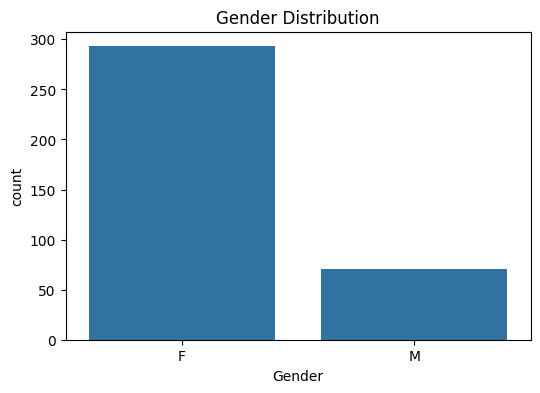

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=patient_data)
plt.title('Gender Distribution')
plt.show()

Females are more than males.

In [12]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

print(cramers_v(patient_data['Hx Smoking'], patient_data['Recurred']))
print(cramers_v(patient_data['Pathology'], patient_data['Recurred']))
print(cramers_v(patient_data['Gender'], patient_data['Recurred']))
print(cramers_v(patient_data['Smoking'], patient_data['Recurred']))
print(cramers_v(patient_data['Focality'], patient_data['Recurred']))
print(cramers_v(patient_data['M'], patient_data['Recurred']))
print(cramers_v(patient_data['Stage'], patient_data['Recurred']))
print(cramers_v(patient_data['Adenopathy'], patient_data['Recurred']))
print(cramers_v(patient_data['T'], patient_data['Recurred']))
print(cramers_v(patient_data['N'], patient_data['Recurred']))



0.11718749999999997
0.25107586767432133
0.3101425326756299
0.3164898153242812
0.36236533566053664
0.3372913838647582
0.4993900250890623
0.6331196116773835
0.5996441476424428
0.624612084273687


Above figures show the association of the individual features and recurrence of thyroid cancer.

From the figures, Tumor size(T), Lymph node involvement(N) and Adenopathy have a high impact on whether a patient get recurrence or not. A patient's smoking history has extremely small impact on whether recurrence occurs.

We can also use the Chi-square & p-value as another way to determine the extent of impact the features have on recurrence.

Chi-square: This value measures the difference between the observed data and the expected values. If there is no association between a particular  observed and the outcome. A high chi-square value suggests that the observed feature distribution is significantly different from what is expected under the assumption of no association.

P-value: This value indicates significance of the correlation between observed data and expected value. If it is a high value means the association between the variables is not due to chance.

Recurred   No  Yes
Gender            
F         227   66
M          29   42
Chi-square: 35.01257416910131, p-value: 3.2758306763157053e-09


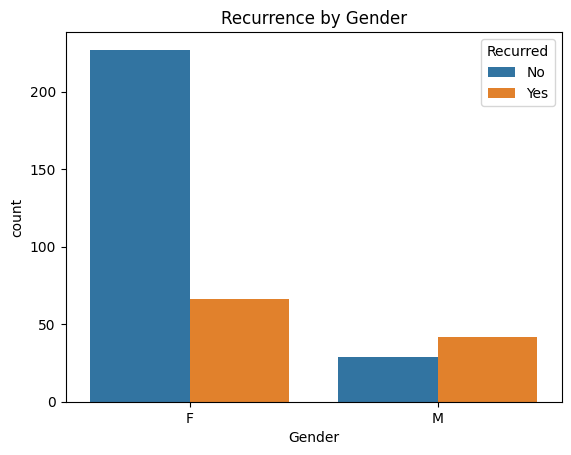

In [17]:
ct_gender = pd.crosstab(patient_data['Gender'], patient_data['Recurred'])
print(ct_gender)

chi2, p, dof, expected = chi2_contingency(ct_gender)
print(f'Chi-square: {chi2}, p-value: {p}')

# Graph To Analyzing the effect of Gender on Recurred
sns.countplot(data=patient_data, x='Gender', hue='Recurred')
plt.title('Recurrence by Gender')
plt.show()



There is a statistical significant relationship between gender and recurrence. Males seem to have a higher recurrence rate compared to females. But it may have been better to have more male specimen so as to draw a better conclusion.

Recurred   No  Yes
T                 
T1a        45    1
T1b        35    5
T2        118   20
T3a        55   41
T3b         2   14
T4a         1   19
T4b         0    8
Chi-square: 130.88460978386675, p-value: 8.370007602185988e-26


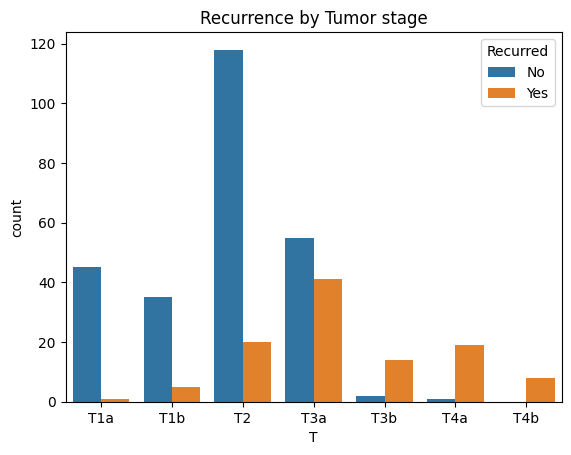

In [21]:
ct_t = pd.crosstab(patient_data['T'], patient_data['Recurred'])
print(ct_t)

chi2, p, dof, expected = chi2_contingency(ct_t)
print(f'Chi-square: {chi2}, p-value: {p}')

# Graph To Analyzing the effect of Tumor stage on Recurred
sns.countplot(data=patient_data, x='T', hue='Recurred')
plt.title('Recurrence by Tumor stage')
plt.show()

There is a strong association between tumor stage (T) and recurrence (Recurred). As tumor stages progress from T1a to T4b, the likelihood of recurrence appears to increase. For example:

- Early-stage tumors like T1a and T1b show fewer cases of recurrence.
- Later stages like T3a, T3b, T4a, and T4b show more frequent recurrence, indicating that patients with more advanced tumors are significantly more likely to experience a recurrence.

This result is highly statistically significant, meaning that the stage of the tumor is very likely to impact the recurrence rate. However, this test only shows association, not causation. Tumor size/stage is strongly correlated with recurrence, but further analysis would be needed to understand the underlying reasons for this relationship.

Recurred   No  Yes
N                 
N0        222   27
N1a        12   10
N1b        22   71
Chi-square: 142.0110531187419, p-value: 1.4544260034549868e-31


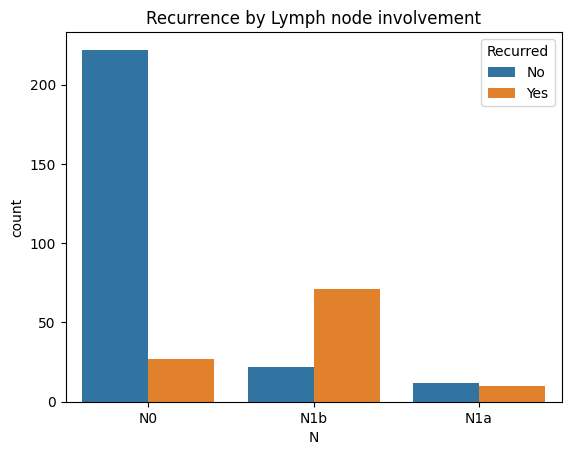

In [22]:
ct_n = pd.crosstab(patient_data['N'], patient_data['Recurred'])
print(ct_n)

chi2, p, dof, expected = chi2_contingency(ct_n)
print(f'Chi-square: {chi2}, p-value: {p}')

# Graph To Analyzing the effect of Lymph node involvement on Recurred
sns.countplot(data=patient_data, x='N', hue='Recurred')
plt.title('Recurrence by Lymph node involvement')
plt.show()

There is a very strong and significant association between the N (lymph node involvement) variable and the likelihood of recurrence. Patients with higher lymph node involvement (N1a, N1b) are much more likely to experience recurrence than those with no lymph node involvement (N0).

Recurred   No  Yes
M                 
M0        256   90
M1          0   18
Chi-square: 41.41063385710294, p-value: 1.2338437472012865e-10


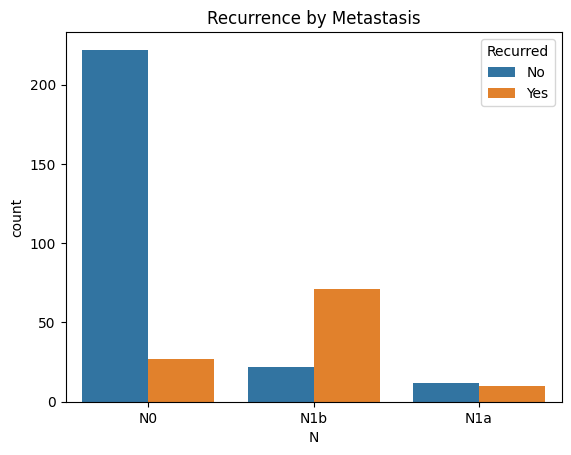

In [24]:
ct_m = pd.crosstab(patient_data['M'], patient_data['Recurred'])
print(ct_m)

chi2, p, dof, expected = chi2_contingency(ct_m)
print(f'Chi-square: {chi2}, p-value: {p}')

# Graph To Analyzing the effect of Metastasis
sns.countplot(data=patient_data, x='N', hue='Recurred')
plt.title('Recurrence by Metastasis')
plt.show()

There is a statistically significant relationship between distant metastasis (M) and recurrence (Recurred). Specifically:
 - M1 (metastasis present): Every patient in this group experienced recurrence, suggesting a very high likelihood of recurrence when metastasis is present.
 - M0 (no metastasis): Even though a portion of patients without metastasis experienced recurrence, a large number (256 patients) did not.

The test strongly indicates that the presence of metastasis (M1) is associated with a higher likelihood of recurrence, and the likelihood that this association is due to chance is extremely low.

This finding suggests that metastasis is a key factor influencing the outcome of recurrence.

All the above Chi-square values show that Tumor size(T), Lymph node involvement(N) and Distant Metastasis have high impact on recurrence.